# Solid Waste Analysis
## Question

It is important for the City of Baltimore to provide services equitably to residents. A key performance indicator (KPI) of many city services is on time completion (completing work before the due date). Solid Waste would like to assess the performance of their services (SR Type), specifically Cleaning, Boarding, High Grass and Weeds (HGW), Dirty Streets, and Dirty Alleys. 





In [5]:
#Import Dependencies
import pandas as pd
import numpy as np 
import matplotlib as plt
from IPython.display import display, HTML

#This originally imported the Excel doc and saved it off as a pickle file for quick access.
"""import pandas as pd 
original_recs = pd.read_excel
(r'311_CSR_SW.xlsx')
original_recs.to_pickle('311_CSR_SW.pkl')
original_recs.head()"""

#Functions to init
def graph_hoods_by_overdue(df, name, sort_type='overdue'):
    overdue_by_hood = group_hoods(df)
    if sort_type == 'overdue':
        sorted_overdue = sort_by_overdue(overdue_by_hood)
        g = graph_hoods(sorted_overdue, name,"num","Neighborhoods, Ranked by % Overdue")
    elif sort_type == 'crime':
        sorted_overdue = sort_by_crime(overdue_by_hood)
        g = graph_hoods(sorted_overdue, name,"num","Neighborhoods, Ranked by Crime Total")
    return g

def group_hoods(df):
    neighborhood_groups = df.groupby("Neighborhood")
    overdue_by_hood = neighborhood_groups["Overdue"].apply(lambda x : x.sum()/len(x)).reset_index(name="Percent Overdue")
    overdue_count = neighborhood_groups["Overdue"].apply(lambda x: len(x)).reset_index(name = "Total")
    overdue_by_hood["Total Requests"] = overdue_count["Total"]
    return overdue_by_hood
    
def sort_by_overdue(df):
    display(df)
    sorted_overdue = df.sort_values(by="Percent Overdue")
    sorted_overdue["num"] = np.arange(0,len(df))
    sorted_overdue.drop(sorted_overdue.loc[sorted_overdue["Total Requests"]<36].index,inplace=True)
    return sorted_overdue

def sort_by_crime(df):
    crime_data = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
    crime_by_hood = crime_data.groupby('Neighborhood')
    crime_by_hood = crime_by_hood.apply(lambda x : len(x)).reset_index(name = 'Crime Total')
    crime_by_hood['Neighborhood']= crime_by_hood['Neighborhood'].str.lower()
    df['Neighborhood']= df['Neighborhood'].str.lower()
    df.drop_duplicates(subset=['Neighborhood'], inplace=True)
    for hood in df['Neighborhood']:
        print(hood)
        y= crime_by_hood.loc[crime_by_hood['Neighborhood'] == hood]['Crime Total'].item()
        print(y)
    df['Crime'] = df['Neighborhood'].apply(lambda x : crime_by_hood.loc[crime_by_hood['Neighborhood'] == x]['Crime Total'].item())
    display(df)

def graph_hoods(df, name, xvalues, xlabel, ):
    g = df.plot(y="Percent Overdue", c="Total Requests", x=xvalues, kind="scatter", colormap='viridis', title=name, figsize= (5,4))
    g.set_xlabel(xlabel, fontsize=12)
    return g

graph_hoods_by_overdue(clean_recs.loc[clean_recs["Created Date"].dt.year == 2019], "Neighborhoods by Overdue Requests", sort_type='crime')

KeyError: 'Column not found: Overdue'

## Initialize Clean Records Dataframe
"Please ignore any services labeled as “proactive”, or status noted as duplicate. Using the dataset “311_CSR” provided and filtering to only include work created from January 1, 2017- December 31, 2019." 

In [7]:


original_recs = pd.read_pickle(r"311_CSR_SW.pkl")

non_proactive_recs = original_recs.loc[original_recs["SR Type"].str.contains('Proactive')==False]
non_duplicate_recs = non_proactive_recs.loc[non_proactive_recs["SR Status"].str.contains('Duplicate')==False]

Y17_19_recs = non_duplicate_recs[(non_duplicate_recs['Created Date'] > '2017-01-01 00:00:01') & (non_duplicate_recs['Created Date'] < '2019-12-31 23:59:59')]

clean_recs = Y17_19_recs

crime_data = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
crime_by_hood = crime_data.groupby('Neighborhood')
crime_by_hood = crime_by_hood.apply(lambda x : len(x)).reset_index(name = 'Crime Total')
crime_by_hood['Neighborhood']= crime_by_hood['Neighborhood'].str.lower()

neighborhood_group = Y17_19_recs.groupby('Neighborhood')

neighborhoods = neighborhood_group.sum()
print(neighborhoods.index)

def fix_hoods(x):
    match_hoods_dict = {
        'Bayview' : 'greektown',
        'CARE' : 'middle east',
        'Edgewood' : 'allendale',
        'Hamilton Hills' : 'westfield',
        'Old Goucher' : 'barclay',
        'Wilhelm Park' : 'morrell park',
        'Wrenlane' : 'wilson park',
        'York-Homeland' : 'woodbourne-mccabe'}
    hoods_to_fix = ['Bayview','CARE', 'Edgewood','Hamilton Hills','Old Goucher','Wilhelm Park' 'Wrenlane','York-Homeland']
    if x in hoods_to_fix:
        return match_hoods_dict[x]
    else:
        return x.lower()
"""for hood in Y17_19_recs['Neighborhood']:
    print(hood)
    fix_hoods(hood)
"""

clean_neighborhoods = []
for hood in neighborhoods.index:
    matched_hood = fix_hoods(hood)

    search = crime_by_hood['Neighborhood'].loc[crime_by_hood['Neighborhood'].str.contains(matched_hood.lower()[:4])]
    if not isinstance(matched_hood, str):
        matched_hood = '    '
    if len(crime_by_hood['Neighborhood'].loc[crime_by_hood['Neighborhood']==matched_hood.lower()]) == 1:
        clean_neighborhoods.append(matched_hood.lower())
    elif len(search) == 1:
        clean_neighborhoods.append(search)
    elif len(search) > 1:
        a = input(matched_hood + "matches: " + ', '.join(search.tolist()) +' What do you want to use?')
        clean_neighborhoods.append(a)
    elif len(search) < 1:
        display(Y17_19_recs.loc[Y17_19_recs['Neighborhood'] == matched_hood])
        print('This neighborhood had no match')
        input('Hit enter when youre ready.')

clean_recs['Neighborhood'] = pd.Series(clean_neighborhoods)
clean_recs"""


Index(['Abell', 'Allendale', 'Arcadia', 'Arlington', 'Armistead Gardens',
       'Ashburton', 'Baltimore Highlands', 'Barclay', 'Barre Circle',
       'Bayview',
       ...
       'Winston-Govans', 'Woodberry', 'Woodbourne Heights',
       'Woodbourne-McCabe', 'Woodmere', 'Wrenlane', 'Wyman Park', 'Wyndhurst',
       'Yale Heights', 'York-Homeland'],
      dtype='object', name='Neighborhood', length=302)


'\nclean_neighborhoods = []\nfor hood in Y17_19_recs[\'Neighborhood\']:\n    matched_hood = fix_hoods(hood)\n\n    search = crime_by_hood[\'Neighborhood\'].loc[crime_by_hood[\'Neighborhood\'].str.contains(matched_hood.lower()[:4])]\n    if not isinstance(matched_hood, str):\n        matched_hood = \'    \'\n    if len(crime_by_hood[\'Neighborhood\'].loc[crime_by_hood[\'Neighborhood\']==matched_hood.lower()]) == 1:\n        clean_neighborhoods.append(matched_hood.lower())\n    elif len(search) == 1:\n        clean_neighborhoods.append(search)\n    elif len(search) > 1:\n        a = input(matched_hood + "matches: " + \', \'.join(search.tolist()) +\' What do you want to use?\')\n        clean_neighborhoods.append(a)\n    elif len(search) < 1:\n        display(Y17_19_recs.loc[Y17_19_recs[\'Neighborhood\'] == matched_hood])\n        print(\'This neighborhood had no match\')\n        input(\'Hit enter when youre ready.\')\n\nclean_recs[\'Neighborhood\'] = pd.Series(clean_neighborhoods)\nclea

In [3]:
asdfsadf 
y17

False

### Question 1
How many of each type of service requests were created each year from 2017-2019?


In [46]:
service_groups = clean_recs.groupby(['SR Type'])
service_groups.size()

SR Type
SW-Boarding        24477
SW-Cleaning        37157
SW-Dirty Alley     72318
SW-Dirty Street    44723
SW-HGW             62972
dtype: int64

What % of service requests were overdue each year? 


In [47]:
overdue_recs = clean_recs.loc[clean_recs["Due Date"] < clean_recs["Close Date"]]
len(overdue_recs)

88068

How did % overdue change overtime?

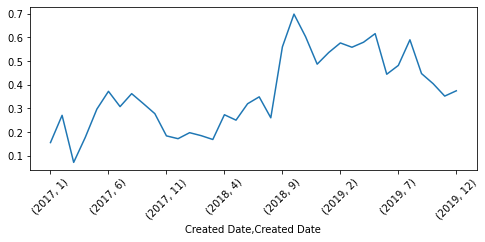

In [48]:
recs_and_overdue = clean_recs
recs_and_overdue["Overdue"] = (clean_recs["Due Date"] - clean_recs["Close Date"]) < pd.Timedelta(0)
by_complete_date_group = recs_and_overdue.groupby([recs_and_overdue["Created Date"].dt.year,recs_and_overdue["Created Date"].dt.month])

overdue_percent = by_complete_date_group["Overdue"].apply(lambda x : x.sum()/len(x))
overdue_percent.plot(kind="line", rot=45, figsize=(8,3))


Using the information calculated above and other information from the dataset, can you provide evidence to determine if service requests created in 2019 are being completed equitably across the city? 

In [6]:
#graph_hoods_by_overdue(clean_recs.loc[clean_recs["Created Date"].dt.year == 2019], "Neighborhoods by Overdue Requests")
graph_hoods_by_overdue(clean_recs.loc[clean_recs["Created Date"].dt.year == 2019], "Neighborhoods by Overdue Requests", sort_type='crime')

#for group in service_groups:
 #   graph_hoods_by_overdue(group[1],group[0])

made it


ValueError: Wrong number of items passed 257, placement implies 1

You may also provide any additional insights that you found while exploring the data.

Query Census Data for each neighborhood

In [42]:
crime_data = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
crime_by_hood = crime_data.groupby('Neighborhood')
crime_by_hood = crime_by_hood.apply(lambda x : len(x)).reset_index(name = 'Crime Total')
crime_by_hood['Neighborhood']= crime_by_hood['Neighborhood'].str.lower()
groups = clean_recs.loc[clean_recs["Created Date"].dt.year == 2019].groupby('Neighborhood')
df = groups.sum().reset_index(name='blah')
df['Neighborhood']= df['Neighborhood'].str.lower()

df['Crime'] = df['Neighborhood'].apply(lambda x : crime_by_hood.loc[crime_by_hood['Neighborhood'] == x]['Crime Total'])


   Neighborhood  Crime Total
94    greektown         1637


TypeError: reset_index() got an unexpected keyword argument 'name'

In [ ]:
import requests

def get_FIPS(hood):
    if type(hood) == type(()):
        lat=hood[0]
        lon=hood[1]
        query = "https://geo.fcc.gov/api/census/block/find?latitude={}&longitude={}&showall=false&format=json".format(lat,lon)
        hood_resp = requests.get(query).json()
        return hood_resp['Block']['FIPS']

neighborhood_centers["FIPS Code"] = neighborhood_centers["Lat and Lon"].apply(get_FIPS)
neighborhood_centers


api.census.gov/data/{YEAR}/{DATASET}?get={variable}&for={geography}&key={dev_key}